# Unstructured Data Analytics HW1

Name: Solutions

Andrew ID: N/A

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
import glob
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename, encoding='utf-8') as f:
        print(filename, len(f.read()))

./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
./HW1_Dataset/Leaves of Grass by Walt Whitman (164).txt 757361
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
./HW1_Dataset/Il Principe. English by Niccolò Machiavelli (428) (Unicode Encoding Conflict).txt 300788
./HW1_Dataset/The Peddler Spy by W. J. Hamilton (356).txt 197390
./HW1_Dataset/Wuthering Heights by Emily Brontë (179) (Unicode Encoding Conflict).txt 669150
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt 1231784
./HW1_Dataset/Emma by Jane Austen (166).txt 902390
./HW1_Dataset/The Faery Queen and Her Knights by Alfred John Church (177).txt 447320
./HW1_Dataset/Ulysses by James Joyce (282).txt 1534140
./HW1_Dataset/Jane Eyre_ An Autobiography by Charlotte Brontë (290) (Unicode Encoding Conflict).txt 1049267
./HW1_Dataset/The Strange Case of Dr. Jekyll an

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above, and do not print out what we asked you to print in **subpart i**.

In [2]:
import glob

filename_length_pairs = []
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename, encoding='utf-8') as f:
        filename_length_pairs.append((len(f.read()), filename))

for rank, (str_len, filename) in enumerate(sorted(filename_length_pairs, reverse=True)[:15]):
    print(rank+1, str_len, filename)

1 5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2 4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt
3 3254333 ./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4 3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5 3033575 ./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6 2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7 1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt
8 1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9 1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10 1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11 1214387 ./HW1_Dataset/The Republic by Plato (246).txt
12 1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13 1175588 ./HW1_Dataset/The Iliad by Homer (256).txt
14 1

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that much later on in the course, we shall see that chopping up large amounts of data into small "batches" is in fact quite common in machine learning since typically we cannot hope to store and process massive datasets on a CPU or GPU all at once!

As a concrete example, suppose that a book's text was `'cat dog shark spam eggs'` and we wanted to split it up into batches where each batch has at most 3 words. Then we would split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [3]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [4]:
total_num_batches = 0
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename, encoding='utf-8') as f:
        total_num_batches += len(split_into_batches(f.read(), 10000))
print('Total number of batches:', total_num_batches)

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [5]:
import spacy
import re
from collections import Counter
import time

tic = time.time()
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

histogram = Counter()
batch_idx = 0
for filename in glob.glob('./HW1_Dataset/*.txt'):
    with open(filename, encoding='utf-8') as f:
        text = f.read()
        for batch in split_into_batches(text, 10000):
            batch_tic = time.time()
            
            print('Processing batch %d of %d...' % (batch_idx + 1, total_num_batches), end=' ')
            parsed_batch = nlp(batch)
            for token in parsed_batch:
                lemma = token.lemma_
                if re.match('[a-zA-Z]+$', lemma):
                    histogram[lemma] += 1
            batch_idx += 1
            
            print('Time elapsed: %f second(s)' % (time.time() - batch_tic))
print('Total time elapsed: %f second(s)' % (time.time() - tic))

Processing batch 1 of 1246... Time elapsed: 0.460585 second(s)
Processing batch 2 of 1246... Time elapsed: 0.421049 second(s)
Processing batch 3 of 1246... Time elapsed: 0.412679 second(s)
Processing batch 4 of 1246... Time elapsed: 0.400971 second(s)
Processing batch 5 of 1246... Time elapsed: 0.391894 second(s)
Processing batch 6 of 1246... Time elapsed: 0.397032 second(s)
Processing batch 7 of 1246... Time elapsed: 0.378130 second(s)
Processing batch 8 of 1246... Time elapsed: 0.373429 second(s)
Processing batch 9 of 1246... Time elapsed: 0.382356 second(s)
Processing batch 10 of 1246... Time elapsed: 0.371976 second(s)
Processing batch 11 of 1246... Time elapsed: 0.376364 second(s)
Processing batch 12 of 1246... Time elapsed: 0.378298 second(s)
Processing batch 13 of 1246... Time elapsed: 0.367999 second(s)
Processing batch 14 of 1246... Time elapsed: 0.368285 second(s)
Processing batch 15 of 1246... Time elapsed: 0.374843 second(s)
Processing batch 16 of 1246... Time elapsed: 0.38

In [6]:
import numpy as np

# convert histogram into two lists `lemmas_unsorted` and `counts_unsorted`
# where the i-th lemma in `lemmas_unsorted` has raw counts given by
# `counts_unsorted[i]`
lemmas_unsorted = []
counts_unsorted = []
for lemma, count in histogram.items():
    lemmas_unsorted.append(lemma)
    counts_unsorted.append(count)
counts_unsorted = np.array(counts_unsorted)  # to allow for fancy numpy indexing

# compute the indices that would sort the list `counts_unsorted` in
# decreasing order (which is why there's a "::-1")
sort_indices = np.argsort(counts_unsorted)[::-1]
sorted_counts = counts_unsorted[sort_indices]  # actually for later problem subparts

print('Rank'.ljust(5), 'Lemma'.ljust(10), 'Raw Count')
for rank, idx in enumerate(sort_indices[:50]):
    print(str(rank + 1).ljust(5), lemmas_unsorted[idx].ljust(10), counts_unsorted[idx])

Rank  Lemma      Raw Count
1     the        702434
2     be         436048
3     and        435424
4     of         386347
5     to         324420
6     I          255123
7     a          233287
8     in         204241
9     he         193634
10    that       159010
11    have       158144
12    it         135425
13    not        112037
14    his        108538
15    you        102592
16    with       101227
17    they       96822
18    for        95302
19    as         90697
20    she        78229
21    but        75595
22    my         74017
23    do         68759
24    at         64950
25    on         62850
26    by         61504
27    this       61246
28    we         60305
29    which      58866
30    all        58711
31    say        58326
32    from       50095
33    so         47970
34    or         47775
35    her        43225
36    one        41174
37    will       40871
38    man        39633
39    their      38416
40    no         38408
41    what       37851
42    there   

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

Text(0, 0.5, 'Raw Count')

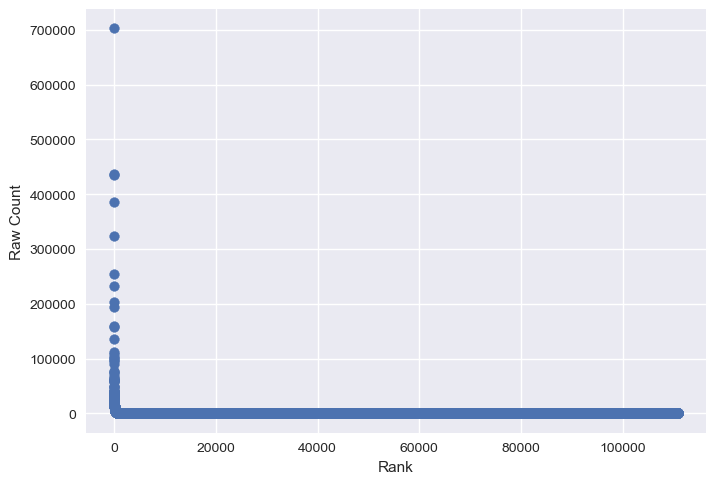

In [7]:
# Raw scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # makes prettier plots

# Using Solution from part (b):
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')

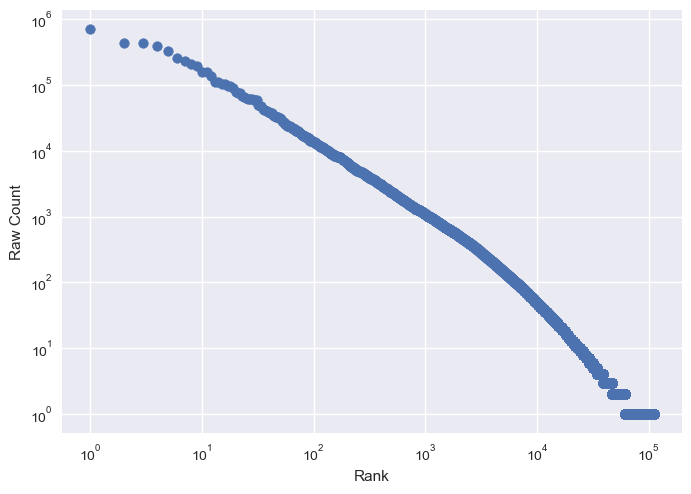

In [8]:
# Log-log plot
plt.scatter(np.array(range(len(sort_indices))) + 1, sorted_counts)
plt.xlabel('Rank')
plt.ylabel('Raw Count')
axis = plt.gca()  # gets the current axis
axis.set_xscale('log')
axis.set_yscale('log')

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [3 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code):

**Answer:** The log-log plot of frequency and rank roughly corresponds to a line with a negative slope (at least up a rank of $\sim10^{3.5}$, after which the plot starts curving downward). Where the plot corresponds to a line, it is consistent with a power law, as the power law suggests $\log(f(r)) = \log(c)-\log(r)$, which is a line with slope of $-1$.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [9]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')
print(sorted_counts[:4].sum() / sorted_counts.sum())

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
print(sorted_counts[:50].sum() / sorted_counts.sum())

Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.16223244412186055
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.48316939764081573


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [10]:
print("Occur only once: ")
print((sorted_counts == 1).sum() / len(sorted_counts))

print("Occur fewer than 10 times: ")
print((sorted_counts < 10).sum() / len(sorted_counts))

Occur only once: 
0.44763641616409666
Occur fewer than 10 times: 
0.7818153912823661


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

([<matplotlib.axis.YTick at 0x7f3f759e4eb0>,
 [Text(0, 0, 'GPE'),
  Text(0, 1, 'LOC'),
  Text(0, 2, 'PERSON'),
  Text(0, 3, 'NORP'),
  Text(0, 4, 'CARDINAL'),
  Text(0, 5, 'DATE'),
  Text(0, 6, 'ORG'),
  Text(0, 7, 'MONEY'),
  Text(0, 8, 'ORDINAL'),
  Text(0, 9, 'TIME'),
  Text(0, 10, 'LANGUAGE'),
  Text(0, 11, 'QUANTITY'),
  Text(0, 12, 'WORK_OF_ART'),
  Text(0, 13, 'PRODUCT'),
  Text(0, 14, 'FAC'),
  Text(0, 15, 'LAW'),
  Text(0, 16, 'EVENT'),
  Text(0, 17, 'PERCENT')])

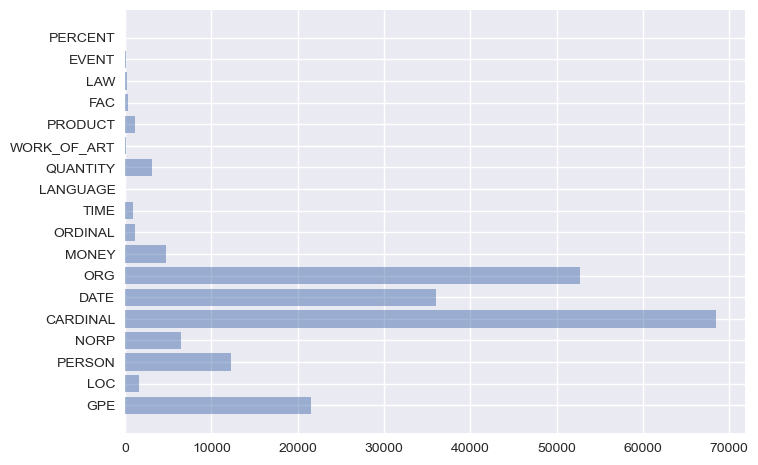

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

for article in reuters_nlp:
    label_list = [ent.label_ for ent in article.ents]
    label_counter.update(label_list)
labels = [item[0] for item in label_counter.items()]
label_occurrences = [item[1] for item in label_counter.items()]
y_pos = range(len(labels))
plt.barh(y_pos, label_occurrences, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [12]:
common_org = Counter()
common_gpe = Counter()

for article in reuters_nlp:
    org_list = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == u"ORG"])
    gpe_list = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == u"GPE"])
    
    # for counting total number of times entities occur and not just whether
    # they occured in the article or not:
    # org_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"ORG"]
    # gpe_list = [ent.lemma_ for ent in article.ents if ent.label_ == u"GPE"]
    common_org.update(org_list)
    common_gpe.update(gpe_list)

print('Most frequently occurring organizations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_org.most_common(10)]))

print()

print('Most frequently occurring locations:')
print("\n".join(["  %s: %d" % (entity, count) for entity, count in common_gpe.most_common(10)]))

Most frequently occurring organizations:
  ct: 2306
  reuters: 443
  revs: 385
  the securities and exchange commission: 249
  ec: 231
  treasury: 219
  fed: 209
  usda: 190
  shr: 182
  the u.s. agriculture department: 167

Most frequently occurring locations:
  u.s.: 1621
  japan: 563
  avg: 487
  the united states: 384
  u.k.: 301
  canada: 289
  new york: 256
  west germany: 238
  washington: 227
  london: 213


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

**Solution note:** For a specific `GPE` entity $x$, we have

$$\text{PMI}(\text{opec}, x)
= \log\frac{P(\text{opec}, x)}{P(\text{opec})P(x)}
= \log\frac{\frac{\text{# articles opec and }x\text{ are both in}}{\text{total # articles}}}{P(\text{opec})\frac{\text{# articles }x\text{ is in}}{\text{total # articles}}}
= \log\frac{\text{# articles opec and }x\text{ are both in}}{P(\text{opec})(\text{# articles }x\text{ is in})}\,.$$

For different values of $x$, $P(\text{opec})$ is a constant! This means that in terms of ordering the different $x$'s by PMI, we do not need to compute $P(\text{opec})$. Moreover, whether we take the logarithm or not also doesn't affect the ordering of the $x$'s according to PMI. Thus, for each $x$, it suffices to compute the fraction

$$\frac{\text{# articles opec and }x\text{ are both in}}{\text{# articles }x\text{ is in}}\,.$$

By sorting the $x$'s according to this fraction, we get the same ordering as if we sorted the $x$'s according to PMI.

In [13]:
co_occurrence_counts = Counter()
gpe_counts = Counter()

for article in reuters_nlp:
    article_gpe = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == u'GPE'])
    article_org = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == u'ORG'])
    gpe_counts.update(article_gpe)
    if 'opec' in article_org:
        co_occurrence_counts.update(article_gpe)
        
part_of_pmi_equation = dict()
for gpe, co_occurrence_count in co_occurrence_counts.items():
    part_of_pmi_equation[gpe] = co_occurrence_count / gpe_counts[gpe]
    
print('Rank'.ljust(5), 'Location'.ljust(30), 'Co-occurrence Count'.ljust(20), 'Occurrence Count'.ljust(20))

for i, w in enumerate(sorted(part_of_pmi_equation,
                             key=part_of_pmi_equation.get,
                             reverse=True)[:50]):
    print(str(i+1).ljust(5), w.ljust(30), str(co_occurrence_counts[w]).ljust(20), str(gpe_counts[w]).ljust(20))

Rank  Location                       Co-occurrence Count  Occurrence Count    
1     opec                           3                    3                   
2     duri                           1                    1                   
3     the neutral zone               3                    3                   
4     petromin                       1                    1                   
5     helle                          1                    1                   
6     hormuz                         1                    1                   
7     emirates                       1                    1                   
8     la                             1                    1                   
9     bethesda                       1                    1                   
10    dunham                         1                    1                   
11    gabon                          2                    2                   
12    opecna                         2              

Your text answer (for this question, your answer is *not* code):

**Answer:** Entities such as 'dubai' and 'qatar' were expected to have very high ranks since they are directly related to OPEC. However, in the result, somewhat meaningless entities have highest PMI values. There are various reasons for why this happens. Perhaps the most important is that PMI naturally gives high scores to rare words (words with very low occurrences; notice how in the above output, the highest ranked words all have occurrence counts that are either 1 or close to 1). Two other reasons for why some meaningless entities might have high PMI scores: the entity recognition labeling of spaCy is not perfect, and the number of documents (here, newspaper articles) might have been too small.